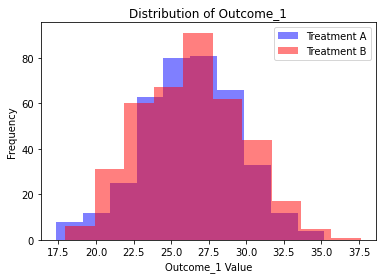

                          sum_sq     df            F         PR(>F)
Treatment               6.163560    1.0     3.121885   7.764710e-02
Age                  4728.301733    1.0  2394.916937  1.521084e-237
StressLevel           513.866410    1.0   260.276826   1.339351e-50
MentalWellnessScore  1628.840752    1.0   825.018902  1.441724e-123
Residual             1506.396388  763.0          NaN            NaN

For Outcome_1 to achieve 80% power using ANCOVA: Required sample size per group is approximately 475154



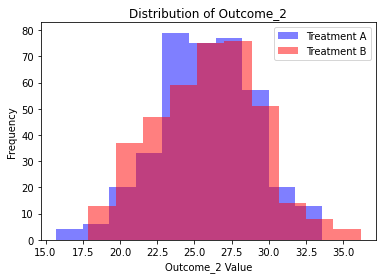

                          sum_sq     df            F         PR(>F)
Treatment               7.883946    1.0     3.665589   5.592069e-02
Age                  4633.847007    1.0  2154.477002  2.036760e-224
StressLevel           443.198836    1.0   206.062414   1.529514e-41
MentalWellnessScore  1921.051866    1.0   893.180560  1.540517e-130
Residual             1641.059646  763.0          NaN            NaN

For Outcome_2 to achieve 80% power using ANCOVA: Required sample size per group is approximately 345140



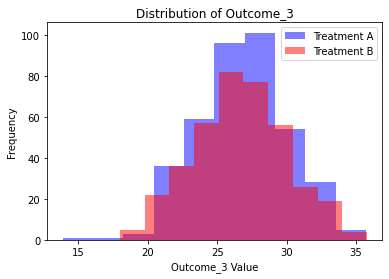

                          sum_sq     df            F         PR(>F)
Treatment               0.050375    1.0     0.023441   8.783560e-01
Age                  4436.223792    1.0  2064.334994  3.245695e-219
StressLevel           490.285984    1.0   228.147758   2.715994e-45
MentalWellnessScore  1758.049917    1.0   818.084059  7.671498e-123
Residual             1639.675132  763.0          NaN            NaN

For Outcome_3 to achieve 80% power using ANCOVA: Required sample size per group is approximately 8359837599



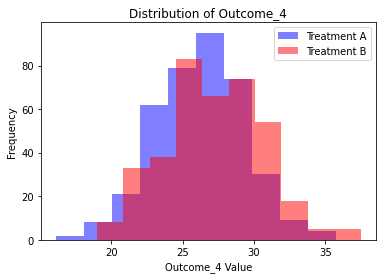

                          sum_sq     df            F         PR(>F)
Treatment             227.452418    1.0   111.587313   1.945501e-24
Age                  4700.911376    1.0  2306.249684  7.993375e-233
StressLevel           368.837416    1.0   180.950268   3.604896e-37
MentalWellnessScore  1643.613740    1.0   806.350804  1.319824e-121
Residual             1555.250242  763.0          NaN            NaN

For Outcome_4 to achieve 80% power using ANCOVA: Required sample size per group is approximately 487



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import FTestAnovaPower

# Simulate Data
np.random.seed(42)
n_per_group = 384
k = 2  # Number of groups (2 treatments)

covariate_age = np.random.normal(30, 5, n_per_group * 2)
covariate_stress = np.random.uniform(1, 10, n_per_group * 2)
covariate_mental_wellness = np.random.uniform(50, 100, n_per_group * 2)

# You can change this d vector to control the differences in means between treatments
d = np.array([0.1, 0.1, 0,1, 0.8]) 

mean_outcomes_A = [5.44, 5, 6, 5.44]
mean_outcomes_B = [m + delta for m, delta in zip(mean_outcomes_A, d)]

std_dev = 1.44

# Simulation
data_list = []

for idx, (mean_a, mean_b) in enumerate(zip(mean_outcomes_A, mean_outcomes_B)):
    outcome_A = np.random.normal(mean_a + 0.5 * covariate_age[:n_per_group] - 0.3 * covariate_stress[:n_per_group] + 0.1 * covariate_mental_wellness[:n_per_group], std_dev, n_per_group)
    outcome_B = np.random.normal(mean_b + 0.5 * covariate_age[n_per_group:] - 0.3 * covariate_stress[n_per_group:] + 0.1 * covariate_mental_wellness[n_per_group:], std_dev, n_per_group)
    data = pd.DataFrame({
        'Treatment': ["A"] * n_per_group + ["B"] * n_per_group,
        'Age': covariate_age,
        'StressLevel': covariate_stress,
        'MentalWellnessScore': covariate_mental_wellness,
        f'Outcome_{idx + 1}': list(outcome_A) + list(outcome_B)
    })
    data_list.append(data)

# ANCOVA and Power Analysis
power_analysis = FTestAnovaPower()

for idx, data in enumerate(data_list, start=1):
    # Plot distributions
    plt.hist(data[data['Treatment'] == 'A'][f'Outcome_{idx}'], alpha=0.5, label='Treatment A', color='blue')
    plt.hist(data[data['Treatment'] == 'B'][f'Outcome_{idx}'], alpha=0.5, label='Treatment B', color='red')
    plt.legend()
    plt.title(f'Distribution of Outcome_{idx}')
    plt.xlabel(f'Outcome_{idx} Value')
    plt.ylabel('Frequency')
    plt.show()

    # ANCOVA
    model = ols(f'Outcome_{idx} ~ Treatment + Age + StressLevel + MentalWellnessScore', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Power Analysis
    f_value = anova_table.loc['Treatment', 'F']
    n_total = n_per_group * k
    eta_squared = f_value / (f_value + (n_total - k - 1))
    required_n = power_analysis.solve_power(effect_size=eta_squared, alpha=0.05, power=0.80, k_groups=k)
    print(f"\nFor Outcome_{idx} to achieve 80% power using ANCOVA: Required sample size per group is approximately {int(np.ceil(required_n))}\n")
